# In this notebook, our main goal will just be the simple **0/1 mortality prediction** using supervised learning and using only SAPS-I and SOFA

In [70]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df1 = pd.read_csv('../data/dataset/Outcomes-a.txt')
df2 = pd.read_csv('../data/dataset/Outcomes-b.txt')
df3 = pd.read_csv('../data/dataset/Outcomes-c.txt')

df = pd.concat([df1,df2,df3], ignore_index=True)
print(df.iloc[4000])
df

RecordID             142675
SAPS-I                   27
SOFA                     14
Length_of_stay            9
Survival                  7
In-hospital_death         1
Name: 4000, dtype: int64


,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,6,1,5,-1,0
1,132540,16,8,8,-1,0
2,132541,21,11,19,-1,0
3,132543,7,1,9,575,0
4,132545,17,2,4,918,0
...,...,...,...,...,...,...
11995,163029,18,8,17,-1,0
11996,163033,9,1,9,-1,0
11997,163034,13,10,8,-1,0
11998,163035,20,9,71,96,0


### So now we know that the 3 text files are incorporated correctly into a single pandas dataframe

In [ ]:
inhospital_labels = np.array(df['In-hospital_death'])
Survival_labels = np.array(df['Survival'])
saps_sofa_data = np.array(df.loc[:, ['SAPS-I', 'SOFA']])

In [125]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

saps_sofa_training_data_cv, saps_sofa_test_data_cv, inhospital_train_labels_cv, inhospital_test_labels_cv = train_test_split(saps_sofa_training_data, inhospital_labels, test_size=0.2, random_state=None)

sm = SMOTE(random_state=0) # using SMOTE as an oversampling technique to oversample deaths
X_res, y_res = sm.fit_resample(saps_sofa_training_data_cv, inhospital_train_labels_cv)
logr = linear_model.LogisticRegression()
logr.fit(X_res,y_res)
acc =0
for i in range(len(inhospital_test_labels_cv)):
    prediction = logr.predict(saps_sofa_test_data_cv[i].reshape(1,-1))
    if prediction == inhospital_test_labels_cv[i]:
        acc+=1
acc/len(inhospital_test_labels_cv)


0.5879166666666666

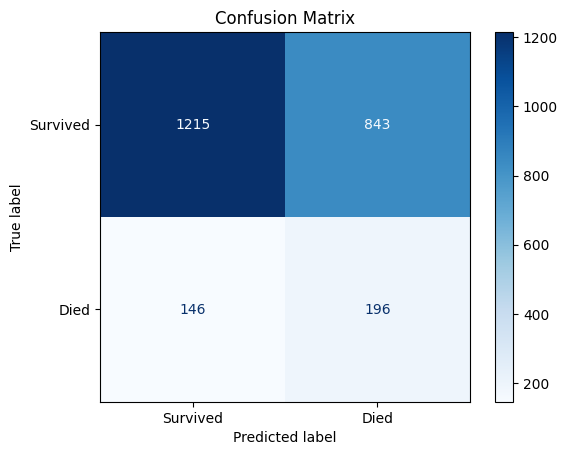

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = logr.predict(saps_sofa_test_data_cv)
cm = confusion_matrix(inhospital_test_labels_cv, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Died"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
